In [1]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(    # get_file함수로 imdb 데이터 가져오기
    fname = 'imdb.tar.gz',
    origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract=True    # 압축 해제하기
)

84131840/84125825 [==============================] - 313s 4us/step


In [4]:
data_set

'C:\\Users\\User\\.keras\\datasets\\imdb.tar.gz'

In [26]:
import os
def directory_data(directory):
    data = {}             # 빈 딕셔너리
    data['review'] = []   # 위 빈 딕셔너리에 'review' 키 값 지정, value에는 빈 리스트 지정
    for file_path in os.listdir(directory):    # os.listdir: 하위 디렉토리
        with open(os.path.join(directory, file_path), 'r', encoding='UTF8') as file:  # 하위 파일 하나하나 열어보기
            data['review'].append(file.read())    # 'review'키값에 해당하는 value값에 파일 내용 하나하나 모두 추가하기
    return pd.DataFrame.from_dict(data)          # 데이터프레임 형태로 반환하기

In [27]:
def data(directory):
    pos_df = directory_data(directory+'\\pos')    # 긍정데이터(pos) 폴더 경로 directory_data함수에 집어넣기 - 데이터프레임 return
    neg_df = directory_data(directory+'\\neg')    # 부정데이터(neg) 폴더
    pos_df['sentiment'] = 1    # 긍정 데이터(1)
    neg_df['sentiment'] = 0    # 부정 데이터(0)
    
    return pd.concat([pos_df, neg_df])    # 두 데이터 합치기

In [28]:
train_df = data('C:\\Users\\User\\.keras\\datasets\\aclImdb\\train')    # 훈련용 데이터
test_df = data('C:\\Users\\User\\.keras\\datasets\\aclImdb\\test')      # 테스트용 데이터

훈련용 데이터와 테스트용 데이터 안에는 각각 pos(긍정)데이터와 neg(부정)데이터가 있다.  
각각의 긍정데이터와 부정데이터 안에 있는 내용을 데이터프레임으로 변환하고,(directory_data함수)  
긍정이냐 부정이냐에 따라 데이터프레임의 'sentiment' 컬럼에 1과 0 데이터를 부여한다.(data함수)  
마지막으로 긍정과 부정 데이터를 합쳐서 훈련용 데이터와 테스트용 데이터를 완성한다.

In [29]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [34]:
train_df.tail()

,review,sentiment
12495,"Towards the end of the movie, I felt it was to...",0
12496,This is the kind of movie that my enemies cont...,0
12497,I saw 'Descent' last night at the Stockholm Fi...,0
12498,Some films that you pick up for a pound turn o...,0
12499,"This is one of the dumbest films, I've ever se...",0


In [30]:
reviews = list(train_df['review'])    # 리뷰만 모아서 리스트로 만들기

In [38]:
reviews[:3]    # 리뷰 세 개만 뽑아봄

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

In [42]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]
print(tokenized_reviews[:1])    # 토크나이징을 어떻게 했는지 첫 번째 리뷰만 맛보기

[['Bromwell', 'High', 'is', 'a', 'cartoon', 'comedy.', 'It', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"Teachers".', 'My', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'Bromwell', "High's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"Teachers".', 'The', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'I', 'knew', 'and', 'their', 'students.', 'When', 'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'I', 'immediately', 'recalled', '.........', 'at', '..........', 'High.', 'A', 'classic', 'line:', 'INSPECTOR:', "I'm", 'here', 'to', 'sack', 'one', 'of', 'your', '

In [44]:
# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
print(review_len_by_token[:5])    # 리뷰 5개의 토크나이징된 길이(단어 개수)

[140, 428, 147, 124, 120]


In [45]:
# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]
print(review_len_by_eumjeol[:5])    # 리뷰 5개의 각 음절 길이(쉽게 말해서 리뷰 하나당 알파벳 몇 개?)

[667, 1939, 695, 540, 528]


In [32]:
import matplotlib.pyplot as plt

<ipython-input-33-2a7df02eae5b>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of Reviews')

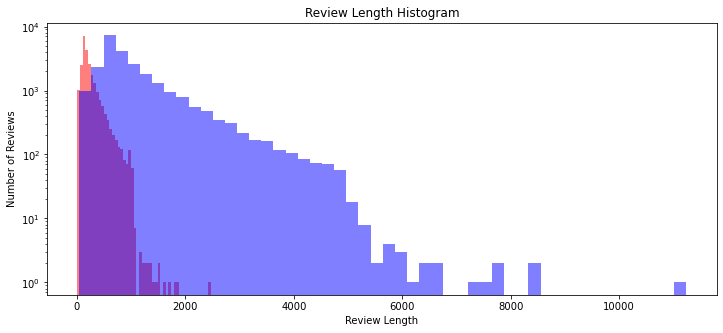

In [33]:
# 문장을 구성하는 단어의 개수와 알파벳 개수를 알아보자
plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')         # 빨간색 - 단어
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')   # 파란색 - 알파벳
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')         # 리뷰 길이
plt.ylabel('Number of Reviews')     # 리뷰 개수

전체적인 분포를 볼 수 있으며, 이상치 확인할 수 있음

In [47]:
print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {:.2f}'.format(np.median(review_len_by_token)))

# 사분위에 대한 경우는 0~100 스케일로 되어 있음
print('제1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.00
제1사분위 길이: 127.0
제3사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x14c69015190>,
 'caps': [<matplotlib.lines.Line2D at 0x14c69015fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c69041940>],
 'medians': [<matplotlib.lines.Line2D at 0x14c69018250>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c69018cd0>],
 'means': [<matplotlib.lines.Line2D at 0x14c690188b0>]}

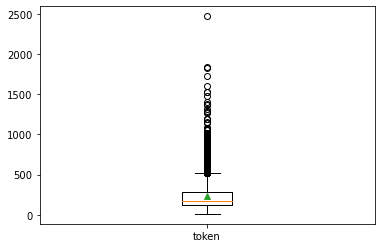

In [48]:
# 단어 개수와 알파벳 개수 - 박스 플롯
plt.boxplot([review_len_by_token],
           labels=['token'],
           showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x14c68ff1880>,
 'caps': [<matplotlib.lines.Line2D at 0x14c68ffc700>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c68ff10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c68ffc9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c690084c0>],
 'means': [<matplotlib.lines.Line2D at 0x14c69008970>]}

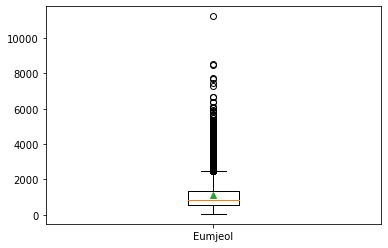

In [49]:
plt.boxplot([review_len_by_eumjeol],
           labels=['Eumjeol'],
           showmeans=True)

둘 모두 이상치가 심함

In [ ]:
# !pip install wordcloud

In [52]:
# 워드클라우드로 데이터 시각화하기
from wordcloud import WordCloud, STOPWORDS

In [53]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(train_df['review']))

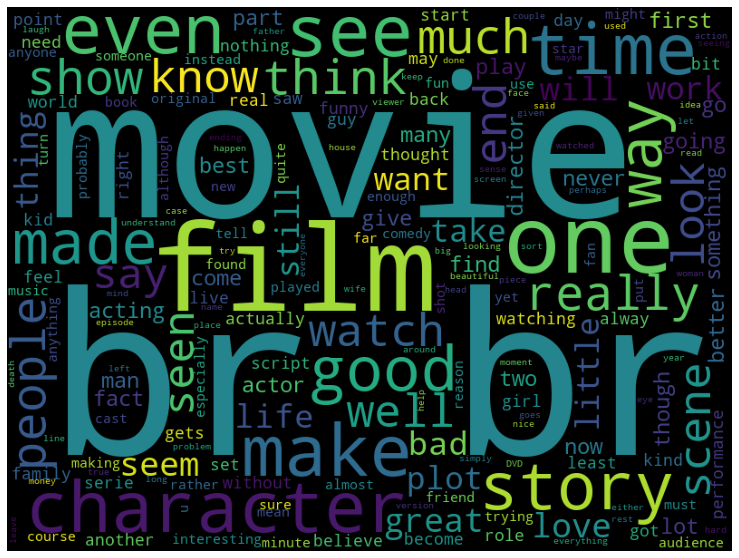

In [54]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

br이 너무 크넹 - html 태그 제거해야함!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

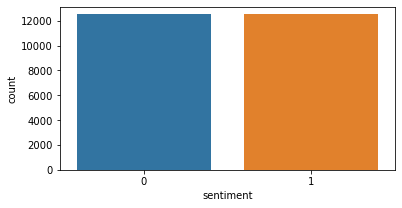

In [55]:
# 긍정 부정 분포 확인
import seaborn as sns

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])

긍정과 부정의 개수가 12000개로 같다. 데이터의 균형이 아주 좋음  
그러나 앞으로 만날 데이터는 모두 이렇게 균형이 좋지는 않을 것